# Support Vector Machine

## 先玩一个 Demo

在使用 Python 实现之前推荐一个 demo ，这个 demo 可以让你通过控制几个参数调整分类结果。玩过之后会对 SVM 有一个直观的理解。

https://cs.stanford.edu/people/karpathy/svmjs/demo/

## 正式开始实现 SVM

这里我们使用 sklearn 库中的 SVM，它可以用来做分类、回归和异常值检测，不过用得最多的还是做分类任务。这里我们也只举分类的例子。

这部分包含了三种实现 SVC，NuSVC，LinearSVC。SVC 即 Support Vector Classifier。其中 SVC 和 NuSVC 比较相似，在参数设置上略有不同。LinearSVC 顾名思义只支持线性核函数。于是我们在这里只介绍 SVC 的用法。

数据集依然是之前使用过的 iris。

同样地导入数据集和所需的函数。

In [1]:
from sklearn import svm, datasets
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

这里我们要可视化地展示分类结果，所以构造两个函数 make_meshgrid 和 plot_contours

In [2]:
def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

导入数据。因为我们要做可视化，所以只取两个特征作为分类依据。

In [3]:
iris = datasets.load_iris()
X = iris.data[:,:2]
y = iris.target

In [4]:
## 不做额外设置的话惩罚系数 C 的默认值为 1.0
## 这里可以通过设置参数 decision_function_shape 更改多分类类型
clf_linear = svm.SVC(kernel='linear')
clf_gaussian = svm.SVC(kernel='rbf')  ## gamma 默认等于0.7，可调
clf_poly = svm.SVC(kernel='poly')   ## poly 默认等于3，可调

In [5]:
model_linear = clf_linear.fit(X, y)
model_gaussion = clf_gaussian.fit(X, y)
model_poly = clf_poly.fit(X, y)

In [6]:
## 可视化专用部分，不必改动
## 目的是生成一堆点（xx,yy）形成网格将现有的数据都覆盖进去，用于后续的预测
X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

print xx.shape, yy.shape

(220L, 280L) (220L, 280L)


Text(0.5,1,u'SVC with linear kernel')

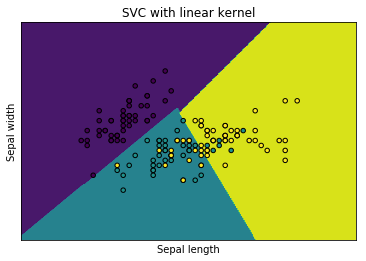

In [7]:
## 线性核
Z = model_linear.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
ax = plt.gca()
ax.contourf(xx, yy, Z)
ax.scatter(X0, X1, c=y, s=20, edgecolors='k')
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_xlabel('Sepal length')
ax.set_ylabel('Sepal width')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title('SVC with linear kernel')

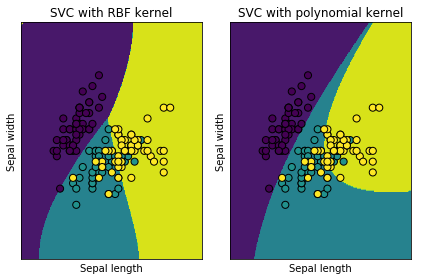

In [8]:
## 高斯核和多项式核
fig, sub = plt.subplots(1, 2)
titles = ('SVC with RBF kernel', 'SVC with polynomial kernel')
models = (model_gaussion, model_poly)
for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy)
    ax.scatter(X0, X1, c=y, s=50, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Sepal length')
    ax.set_ylabel('Sepal width')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)
plt.tight_layout()
plt.show()

可以自己调整各种参数感受 decision surface 的区别。

## 用于预测

以高斯核的 SVM 为例说明其他的一些功能。

训练好的 SVM 依然可以通过 predict 函数来预测结果。

In [9]:
model_gaussion.predict(X[:10,:])

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

这里我们用 confusion matrix 混淆矩阵开查看分类准确程度

In [10]:
y_pred = model_gaussion.predict(X)
cnf_matrix = confusion_matrix(y_pred, y)
print cnf_matrix

[[50  0  0]
 [ 0 38 14]
 [ 0 12 36]]


在这个矩阵中行表示真实类别1，2，3；列表示预测的类别1，2，3。对角线上的数字表示预测正确的样本个数，14表示有14个本来是第二类的样本被认为是第三类了。以此类推。

In [11]:
## 通过调用 score 查看预测的 mean accuracy
model_gaussion.score(X, y)

0.8266666666666667

In [12]:
## 通过调用 decision_function 查看样本到各个超平面的距离
## 默认采用ovr的方式进行多分类
model_gaussion.decision_function(X[:10,:])

array([[ 2.43027155,  0.91342349, -0.34369504],
       [ 2.25258492,  1.04118453, -0.29376945],
       [ 2.41668321,  0.90234907, -0.31903228],
       [ 2.39224676,  0.90361646, -0.29586322],
       [ 2.49944785,  0.85780767, -0.35725552],
       [ 2.44135124,  0.84848691, -0.28983815],
       [ 2.5       ,  0.8235153 , -0.3235153 ],
       [ 2.42282621,  0.92251451, -0.34534072],
       [ 2.33695451,  0.90363335, -0.24058787],
       [ 2.30797686,  1.00300517, -0.31098203]])

## 支撑向量

也可以查看支撑向量 support vectors 的相关信息

In [13]:
## 获得支撑向量
model_gaussion.support_vectors_

array([[4.9, 3. ],
       [4.8, 3. ],
       [5.8, 4. ],
       [5.7, 3.8],
       [5.4, 3.4],
       [5. , 3. ],
       [5.4, 3.4],
       [5.5, 3.5],
       [4.9, 3.1],
       [4.5, 2.3],
       [4.8, 3. ],
       [7. , 3.2],
       [6.4, 3.2],
       [6.9, 3.1],
       [6.5, 2.8],
       [5.7, 2.8],
       [6.3, 3.3],
       [4.9, 2.4],
       [6.6, 2.9],
       [5.2, 2.7],
       [5. , 2. ],
       [5.9, 3. ],
       [6. , 2.2],
       [6.1, 2.9],
       [6.7, 3.1],
       [5.6, 3. ],
       [5.8, 2.7],
       [6.2, 2.2],
       [5.9, 3.2],
       [6.1, 2.8],
       [6.3, 2.5],
       [6.1, 2.8],
       [6.4, 2.9],
       [6.6, 3. ],
       [6.8, 2.8],
       [6.7, 3. ],
       [6. , 2.9],
       [5.8, 2.7],
       [6. , 2.7],
       [5.4, 3. ],
       [6. , 3.4],
       [6.7, 3.1],
       [6.3, 2.3],
       [5.6, 3. ],
       [6.1, 3. ],
       [5.8, 2.6],
       [5. , 2.3],
       [5.7, 3. ],
       [5.7, 2.9],
       [6.2, 2.9],
       [5.1, 2.5],
       [5.7, 2.8],
       [6.3,

In [14]:
## 获得支撑向量的 indices
model_gaussion.support_

array([  1,  12,  14,  18,  20,  25,  31,  36,  37,  41,  45,  50,  51,
        52,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  65,  66,
        67,  68,  70,  71,  72,  73,  74,  75,  76,  77,  78,  82,  83,
        84,  85,  86,  87,  88,  91,  92,  93,  95,  96,  97,  98,  99,
       100, 101, 103, 104, 106, 108, 110, 111, 112, 113, 114, 115, 116,
       118, 119, 121, 123, 126, 127, 128, 131, 132, 133, 134, 136, 137,
       138, 140, 142, 144, 145, 146, 147, 148, 149])

In [15]:
## 获得每个 class 的支撑向量个数
model_gaussion.n_support_

array([11, 41, 35])

请比较 SVM 与逻辑回归、决策树在同一个数据集 iris 上做分类时 decision boundary 的差异

请用上这个数据集的全部特征，并且调整各个参数，看分类效果是否有改善